# 
# House Prices - Using Created Functions
#  

## Importing Modules

In [82]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import copy, math

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
%matplotlib inline

##### Importing Data

In [40]:
train_data = pd.read_csv('train.csv')
train_data['train_set'] = 1
test_data = pd.read_csv('test.csv')
test_data['train_set'] = 0
all_data = pd.concat([train_data, test_data])

all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_set
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,

## 
## 
## Exploratory Data Analysis

##### Simple observations of our data to get familiar and build intuition

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [42]:
pd.set_option('display.max_columns', None)
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train_set
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


##### Separating Numerical and Categorical columns 

In [43]:
numerics = ['int64', 'float64']

numerical_cols = list(train_data.select_dtypes(include=numerics).columns)
categorical_cols = list(train_data.select_dtypes(exclude=numerics).columns)

data_num = train_data[numerical_cols].drop(['Id','train_set'], axis = 1) 
data_cat = train_data[categorical_cols]
data_cat['SalePrice'] = train_data['SalePrice']

print(data_num.shape)
print(data_cat.shape)

(1460, 37)
(1460, 44)


##### Looking at Correlation in our data

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


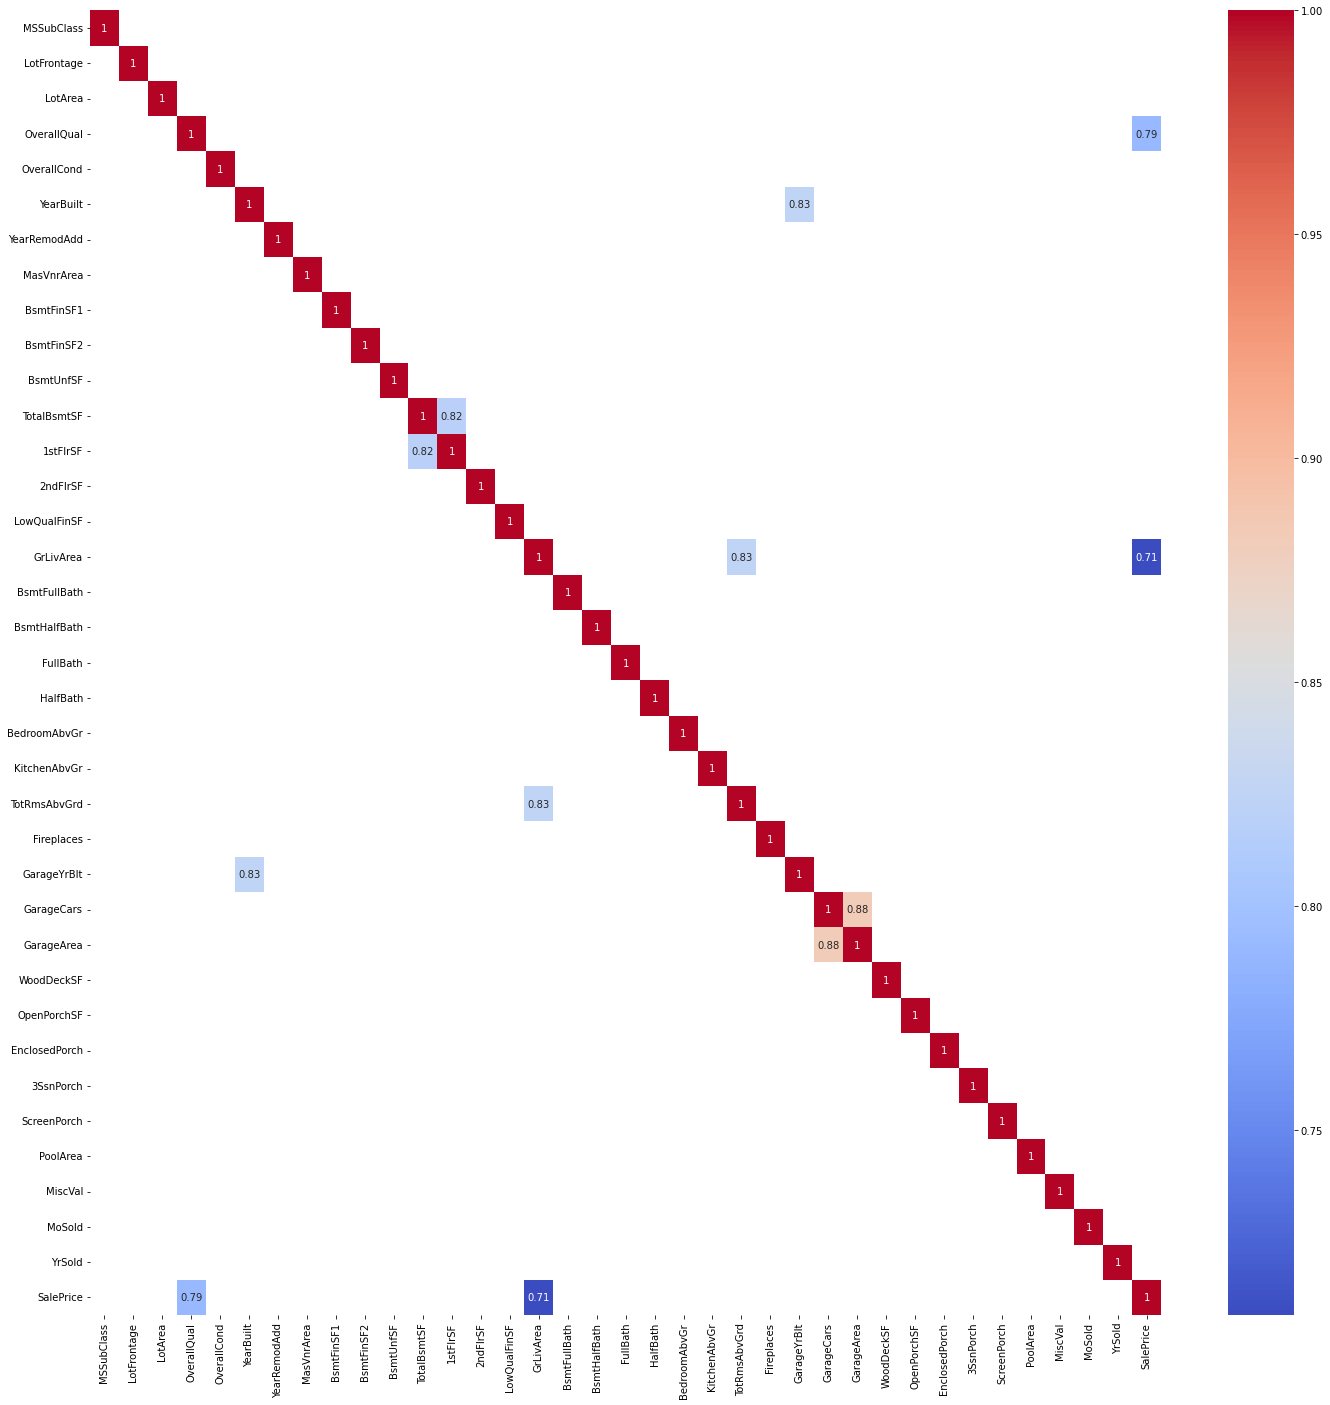

In [44]:
print(data_num.corr()['SalePrice'].sort_values(ascending=False))
corr = data_num.corr()
corr = corr[abs(corr) >= 0.7]
plt.figure(figsize=(24,24))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

We find that some obvious values are highly correlated to the housing price (e.g OverallQual) and others have a very low 
correlation with the sale price, we can drop those confidently.<br>
These are the features that will be dropped:

PoolArea        <br>
MoSold          <br>
3SsnPorch       <br>
BsmtFinSF2      <br>
BsmtHalfBath    <br>
MiscVal         <br>
LowQualFinSF    <br>
YrSold          <br>
OverallCond     <br>
MSSubClass      <br>
EnclosedPorch   <br>
KitchenAbvGr 

In [45]:
#Dropping the features
train_data = train_data.drop(['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 
                          'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'], axis = 1)
train_data.shape

(1460, 70)

We also find that some values are highly correlated with one another. Therefore, we could cut one of the values and still retain most of the information provided by the cut value (e.g GarageYrBlt and YearBuilt)

##### Selecting which features to drop based on Pearson Correlation

In [46]:
def correlation(dataset, threshold):
    drops = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                drops.add(corr_matrix.columns[i])
    
    return drops

#We run the function to return the function choosing 0.7 as our threshold.
#Features which have over 70% correlation to another (except SalePrice), will be dropped
correlation(train_data, 0.7)

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

Ignoring SalePrice, we find that there are 4 features above the threshold that we can drop from our dataset: <br>
1stFlrSF<br> GarageArea<br> GarageYrBlt<br> TotRmsAbvGrd


In [47]:
#Dropping the 4 features
train_data = train_data.drop(['1stFlrSF','GarageArea','GarageYrBlt','TotRmsAbvGrd'], axis = 1)
train_data.shape

(1460, 66)

In [48]:
#We want the changes that were just made to be reflected on my numerical data set so 
#we will re-run the code that set it.

numerical_cols = list(train_data.select_dtypes(include=numerics).columns)
categorical_cols = list(train_data.select_dtypes(exclude=numerics).columns)

data_num = train_data[numerical_cols].drop(['Id','train_set'], axis = 1) 

#data_cat = all_data[categorical_cols]
#data_cat['SalePrice'] = train_data['SalePrice']

print(data_num.shape)
print(data_cat.shape)

(1460, 21)
(1460, 44)


##### Plotting our data for analysis

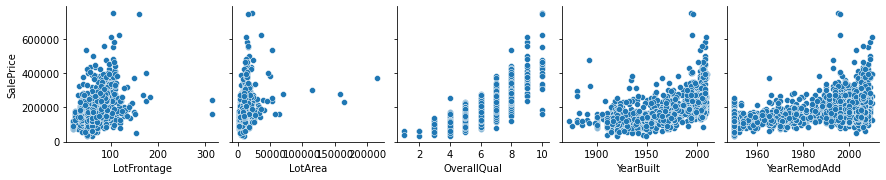

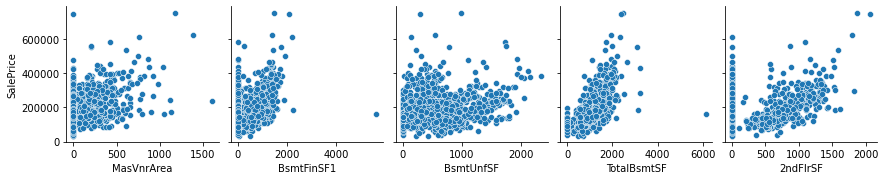

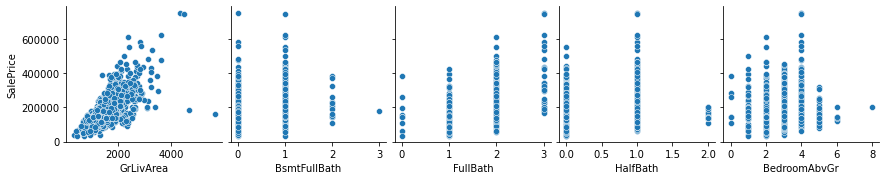

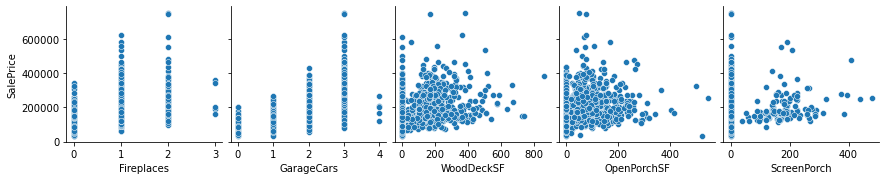

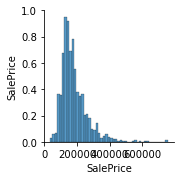

In [49]:
#Using scatter plots to observe the relationships between features and SalePrice
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data = data_num,
                 x_vars = data_num.columns[i:i+5],
                 y_vars = ['SalePrice'])

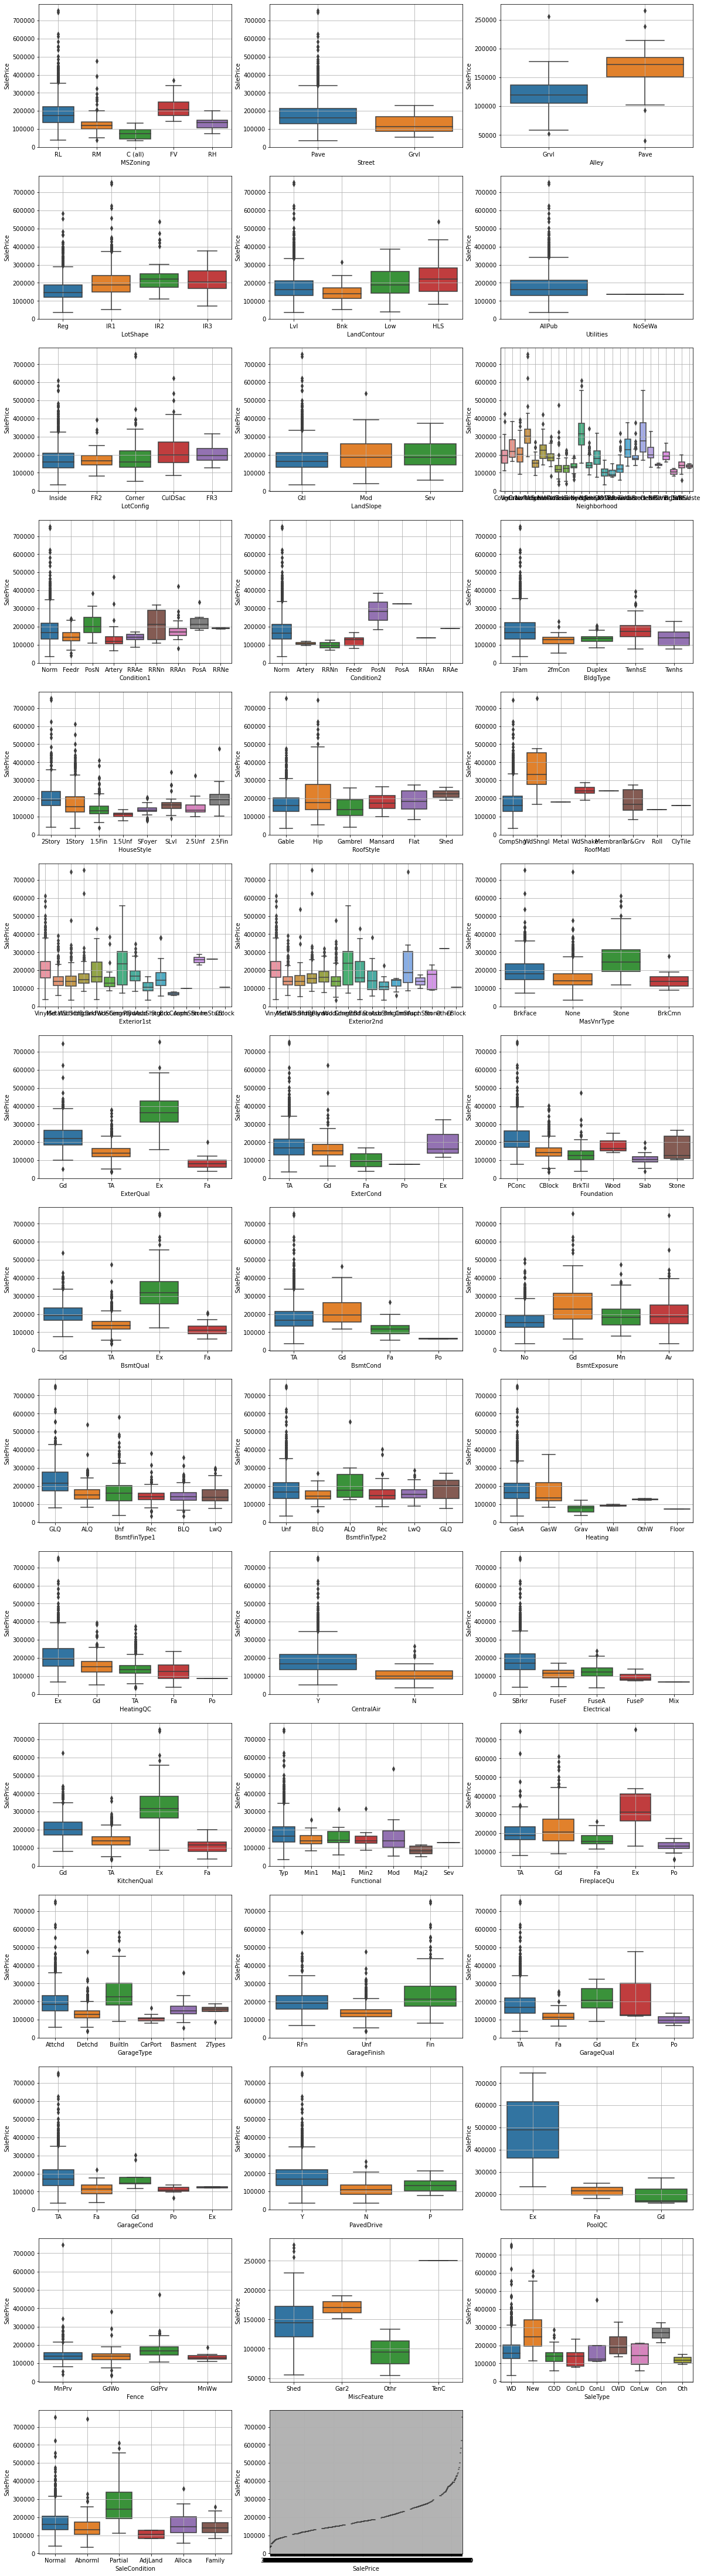

In [50]:
#Using Suplots to observe the relationship between categorical features and SalePrice
plt.figure(figsize=[20,80])
for i in range(0, len(data_cat.columns)):
    plt.subplot(15, 3, i + 1)
    sns.boxplot(data = data_cat, x=data_cat.iloc[:,i], y='SalePrice')
    plt.grid()

In [51]:
#The 6th graph ("Utilities") catches my attention as the features seems to have all it's value belonging to the same category.

data_cat['Utilities'].value_counts()['NoSeWa']

#The other categorical value of the Utilities feature only appears once. We will drop it from our dataset. 

train_data = train_data.drop(['Utilities'], axis = 1)
train_data.shape

(1460, 65)

We will run p-value tests to see if our categorical features have an influence on the Sale price <br>
H0 = Our feature has no connection to the sale price <br>
H1 = Our feature has a connection to the sale price <br>

We will be rejecting features that have a p-value above 0.01. <br>
P-values under 0.01 will result in us rejecting the null hypothesis and assuming a relationship between sale price and the feature. The lower the P-value = the stronger the relationship between sale price and the feature.<br>
We want to only keep features that impact the sale price.

In [52]:
#Looping through our categorical features to find those with a p-value above 0.01
def p_value(dataset, threshold):
    drops = set()
    
    for i in dataset.columns:
        formula = f'SalePrice ~ C({i})'
        model = ols(formula, dataset).fit()
        aov_table = anova_lm(model)
        p_values = aov_table.loc["C("+i+")", "PR(>F)"]
        nums = aov_table.loc["Residual","df"] 
        
        if p_values >= threshold or nums < 800:
            drops.add(i)
            
    return drops 


#This code will flag features that do not have a relationship with the sale price or have too many null values. 
#We can then drop the flagged features

p_value(data_cat, 0.01)

{'Alley',
 'BsmtFinType2',
 'Condition2',
 'Fence',
 'FireplaceQu',
 'LandSlope',
 'MiscFeature',
 'PoolQC',
 'SalePrice',
 'Street',
 'Utilities'}

In [53]:
#Dropping the flagged features

train_data = train_data.drop(['Alley','BsmtFinType2','Condition2','Fence','FireplaceQu','LandSlope',
                              'MiscFeature','PoolQC','Street','Street'], axis = 1)
train_data.shape

(1460, 56)

In [54]:
#Here we reflect the changes made unto our categorical and numerical features

#data_num = train_data[list(train_data.select_dtypes(include=numerics).columns)]
#data_num = data_num.drop(['Id','train_set'], axis = 1)

data_cat = train_data[list(train_data.select_dtypes(exclude=numerics).columns)]
data_cat['SalePrice'] = train_data['SalePrice']


print(data_num.shape)
print(data_cat.shape)


(1460, 21)
(1460, 34)


## 
## 
## Feature Engineering

##### Imputing null values for the numerical features (mean)

In [55]:
#Printing our null values
for i in data_num.columns:
    if data_num[i].isna().sum() > 0:        
        print(i+':', data_num[i].isna().sum())

LotFrontage: 259
MasVnrArea: 8


In [56]:
#Getting more information about the columns with null values to help us choose the imputation technique
print(data_num.LotFrontage.describe())
print(data_num.MasVnrArea.describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [57]:
#We perform mean imputation
data_num.MasVnrArea[np.isnan(data_num.MasVnrArea)] = np.nanmean(data_num.MasVnrArea, axis=0)
data_num.LotFrontage[np.isnan(data_num.LotFrontage)] = np.nanmean(data_num.LotFrontage, axis=0)

#Printing out columns with null values to check if the imputation was successful
for i in data_num.columns:
    if data_num[i].isna().sum() > 0:        
        print(i+':', data_num[i].isna().sum())

##### Imputing null values for our categorical features (mode)

In [58]:
#Printing out the features with null values
for i in data_cat.columns:
    if data_cat[i].isna().sum() > 0:       
        print(i+':', data_cat[i].isna().sum())

MasVnrType: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
Electrical: 1
GarageType: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81


In [59]:
#Getting information on the features with null values to help us choose which approach to take in imputing values 
#(we choose mode imputation)
for i in data_cat.columns:
    if data_cat[i].isna().sum() > 0:     
        print(data_cat[i].describe())
        print()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object



In [60]:
#Imputing the categorical values using the mode
for i in data_cat.columns:
    if data_cat[i].isna().sum() > 0:       
        data_cat[i] = data_cat[i].fillna(data_cat[i].mode()[0])
        

#Printing out the categorical features with null values to check if the imputation worked
for i in data_cat.columns:
    if data_cat[i].isna().sum() > 0:       
        print(i+':', data_cat[i].isna().sum()) 

##### Transforming the data - Encoding

In [61]:
#Copying our data_cat and data_num tables to a temporary table to get dummy variables for our 
#categorical values
df = pd.concat([data_cat, data_num], axis=1)
train_data_dummies = pd.get_dummies(df)
train_data_dummies.columns

Index(['SalePrice', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

##### Scaling

In [62]:
#Scaling our dataset (we don't want to scale the SalePrice so it is dropped from our table)
train_dummies_scaled = train_data_dummies.drop(['SalePrice'], axis=1).copy()

#Importing Standard Scaler and then scaling only our numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerics = ['int64', 'float64']
numerical_cols = list(train_data.drop(['Id','SalePrice','train_set'], axis=1).select_dtypes(include=numerics).columns)

train_dummies_scaled[numerical_cols] = scaler.fit_transform(train_dummies_scaled[numerical_cols])
train_dummies_scaled

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,ScreenPorch,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.229372,-0.207142,0.651479,1.050994,0.878668,0.511418,0.575425,-0.944591,-0.459303,1.161852,0.370333,1.107810,0.789741,1.227585,0.163779,-0.951226,0.311725,-0.752176,0.216503,-0.270208,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

### 
### Applying the changes to the entire dataset

In [63]:
#Applying the changes made to the train set to the entire dataset
print(all_data.shape)

#Dropping features
all_data = all_data.drop(['PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal', 
                          'LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch', 
                          'KitchenAbvGr','1stFlrSF','GarageArea','GarageYrBlt','TotRmsAbvGrd',
                          'Utilities','Alley','BsmtFinType2','Condition2','Fence','FireplaceQu',
                          'LandSlope','MiscFeature','PoolQC','Street','Street'], axis=1)
print(all_data.shape)

#Creating our numerical_cols and categorical_cols
numerical_cols = list(all_data.select_dtypes(include=numerics).columns)
categorical_cols = list(all_data.select_dtypes(exclude=numerics).columns)

#removing the items that won't be scaled
numerical_cols.remove('Id')
numerical_cols.remove('SalePrice')
numerical_cols.remove('train_set')

(2919, 82)
(2919, 56)


In [64]:
#Checking how many missing values are in the test set to see if we can impute based on the whole set
for i in test_data.columns:
    if test_data[i].isna().sum()>0:
        print(i+':',test_data[i].isna().sum())

MSZoning: 4
LotFrontage: 227
Alley: 1352
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
MasVnrArea: 15
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinSF1: 1
BsmtFinType2: 42
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
KitchenQual: 1
Functional: 2
FireplaceQu: 730
GarageType: 76
GarageYrBlt: 78
GarageFinish: 78
GarageCars: 1
GarageArea: 1
GarageQual: 78
GarageCond: 78
PoolQC: 1456
Fence: 1169
MiscFeature: 1408
SaleType: 1


In [65]:
#Deciding if we keep Lot Frontage by comparing it to our train_data 
#(we will perform the same imputation as previously)
print(test_data.LotFrontage.describe())
print(train_data.LotFrontage.describe())

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


##### Imputing numerical features

In [66]:
#We perform mean imputation
for i in all_data[numerical_cols].columns:
    if all_data[i].isna().sum() > 0:   
        all_data[i][np.isnan(all_data[i])] = np.nanmean(all_data[i], axis=0)

#Checking for null values in the numerical features to make sure the code worked
for i in all_data[numerical_cols].columns:
    if all_data[numerical_cols][i].isna().sum()>0:
        print(i+':',all_data[i].isna().sum())        

##### Imputing categorical features

In [67]:
#We perform imputation using the mode
for i in all_data[categorical_cols].columns:
    if all_data[i].isna().sum() > 0:
        all_data[i] = all_data[i].fillna(all_data[i].mode()[0])


#Checking for null values in the categorical features to make sure the code worked
for i in all_data[categorical_cols].columns:
    if all_data[categorical_cols][i].isna().sum()>0:
        print(i+':',all_data[i].isna().sum())

In [68]:
#Checking the entire dataset for null values
for i in all_data.columns:
    if all_data[i].isna().sum() > 0:
        print(i+':',all_data[i].isna().sum())

SalePrice: 1459


##### Transforming the data  - Encoding

In [69]:
all_dummies = pd.get_dummies(all_data.drop(['Id','SalePrice'], axis=1))
all_dummies.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

##### Scaling our dataset

In [70]:
#We are scaling the original numerical columns except train_set, id, and SalePrice
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[numerical_cols] = scaler.fit_transform(all_dummies_scaled[numerical_cols])
all_dummies_scaled[numerical_cols]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,ScreenPorch
0,-0.202068,-0.217879,0.646183,1.046258,0.896833,0.525202,0.580907,-0.934863,-0.444328,1.207379,0.413547,1.087023,0.781366,1.232599,0.169927,-0.924311,0.306528,-0.740760,0.200006,-0.285935
1,0.501870,-0.072044,-0.063185,0.154764,-0.395604,-0.572250,1.178112,-0.629896,0.477111,-0.785025,-0.471891,-0.819679,0.781366,-0.756321,0.169927,0.623632,0.306528,1.614879,-0.702843,-0.285935
2,-0.061280,0.137197,0.646183,0.980221,0.848965,0.334828,0.097873,-0.288516,-0.299076,1.235375,0.563755,1.087023,0.781366,1.232599,0.169927,0.623632,0.306528,-0.740760,-0.081209,-0.285935
3,-0.436714,-0.078385,0.646183,-1.859351,-0.682812,-0.572250,-0.494941,-0.047275,-0.671283,0.978742,0.427382,1.087023,-1.027363,-0.756321,0.169927,0.623632,1.619961,-0.740760,-0.184815,-0.285935
4,0.689587,0.518903,1.355551,0.947203,0.753229,1.387486,0.468931,-0.161068,0.211573,1.671651,1.378042,1.087023,0.781366,1.232599,1.385655,0.623632,1.619961,0.776967,0.540424,-0.285935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.266952,-1.043937,-1.481920,-0.043346,-0.682812,-0.572250,-0.969192,-0.033619,-1.147889,0.488807,-0.807883,-0.819679,-1.027363,1.232599,0.169927,-0.924311,-2.320339,-0.740760,-0.702843,-0.285935
1455,-2.266952,-1.049263,-1.481920,-0.043346,-0.682812,-0.572250,-0.415899,-0.607138,-1.147889,0.488807,-0.807883,-0.819679,-1.027363,1.232599,0.169927,-0.924311,-1.006906,-0.740760,-0.347624,-0.285935
1456,4.256207,1.246808,-0.772552,-0.373528,0.561757,-0.572250,1.718232,-1.276243,0.390868,-0.785025,-0.546995,1.087023,-1.027363,-0.756321,1.385655,0.623632,0.306528,3.006130,-0.702843,-0.285935
1457,-0.342855,0.034605,-0.772552,0.683057,0.370284,-0.572250,-0.229272,0.032381,-0.317233,-0.785025,-1.049006,-0.819679,-1.027363,-0.756321,0.169927,-0.924311,-2.320339,-0.108374,-0.229217,-0.285935


##### Splitting the data

In [71]:
#SalePrice and Id has been dropped from our dummies earlier

#We split the data into train test again by selecting the rows which have a sale price
#we had previously marked those with a train_set = 1
X_train = all_dummies_scaled[all_dummies_scaled.train_set == 1].drop(['train_set'], axis = 1).values

#y_train consists of the SalePrice of our training set, we marked those rows with a train_set = 1
y_train = all_data[all_data.train_set == 1].SalePrice.values 

#X_test contains the test data, we previously marked those rows with train_set = 0
X_test = all_dummies_scaled[all_dummies_scaled.train_set == 0].drop(['train_set'], axis = 1).values

#y_test is what we must predict

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1460, 233)
(1460,)
(1459, 233)


##  
##  
## Model Building

##### Setting up our functions

In [72]:
#computing our cost function
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns
      cost (scalar)    : cost
    """
    
    m = X.shape[0]
    
    f_wb = X @ w + b 
    total_cost = (1/(2*m)) * np.sum((f_wb - y)**2)
    
    return total_cost   

In [73]:
#computing our gradient, we will use this to find the best values for our parameter w and b
def compute_gradient(X, y, w, b, lambda_ = 1):
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
      lambda_ (scalar): Controls amount of regularization
    
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):             The gradient of the cost w.r.t. the parameter b.  
    """
    
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(X[i],w) + b) - y[i]
        dj_db += err
        
        for j in range(n):       
            dj_dw[j] += err * X[i][j]          
    
    dj_dw = dj_dw / m + (lambda_/m) * w
    dj_db = dj_db / m 
    
    return dj_db, dj_dw

In [83]:
#Computing gradient descent to learn w and b by taking num_iters gradient steps with learning rate alpha
def gradient_descent(X, y, w_in, b_in, lambda_, cost_function, gradient_function, alpha, num_iters):
    """
    Args:
        X (ndarry (m,n))    : Data, m examples with n features
        y (ndarry (m,))     : target values
        w_in (ndarray (n,)) : initial model parameters
        b_in (scalar)       : initial model parameter
        cost_function       : function to compute cost
        gradient_function   : function to compute the gradient
        alpha (float)       : learning rate
        num_iters (int)     : number of iterations to run gradient descent
        
    Returns:
        w (ndarray (n,))    : Updated values of parameters
        b (scalar)          : Updated value of parameter
    """
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        
        #Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)
        
        #Update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db 
        
        #Save cost J at each iteration
        if i < 100000: 
            J_history.append(cost_function(X, y, w, b))
            
        #Print cost at interval
        if i % math.ceil(num_iters / 10) == 0:
            print(f'Iteration {i:4d}: Cost {J_history[-1]:8.2f}')
            
    return w, b, J_history 

##### Finding the best value for alpha and lambda
Remove quotation marks to run (takes a long time)

In [75]:
#We found the best value for alpha and lambda_ so we won't run again

"""
m,n = X_train.shape

initial_w = np.random.randint(0,30,n)
initial_b = 0.
iterations = 1000
alpha = [1e-2, 3e-2, 5e-2, 7e-2, 9e-2, 9e-3]
lambda_ = [-2, -1, 0.5, 1, 2]


best_alpha = 0
diff = 0

for i in alpha:
    for r in lambda_:
        print(f'Model using lambda_:{r} and alpha: {i}')
        w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, r, compute_cost, compute_gradient,
                                               i, iterations)
        dist = 0
        ssr = 0
        sst = 0

        for j in range(m):
            pred = np.dot(X_train[j], w_final) + b_final
            pred = pred
            ssr += (y_train[j] - pred)**2
            sst += (y_train[j] - np.mean(y_train))**2

        dist = 1 - (ssr / sst)
        print(dist)

        if dist > diff: 
            diff = dist
            best_alpha = i
            best_lambda_ = r

print(f'The best R² is {diff:0.3f}')
print(f'The best value for alpha is {best_alpha}')
print(f'The best value for lambda is {best_lambda_}')
"""

"\nm,n = X_train.shape\n\ninitial_w = np.random.randint(0,30,n)\ninitial_b = 0.\niterations = 1000\nalpha = [1e-2, 3e-2, 5e-2, 7e-2, 9e-2, 9e-3]\nlambda_ = [-2, -1, 0.5, 1, 2]\n\n\nbest_alpha = 0\ndiff = 0\n\nfor i in alpha:\n    for r in lambda_:\n        print(f'Model using lambda_:{r} and alpha: {i}')\n        w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, r, compute_cost, compute_gradient,\n                                               i, iterations)\n        dist = 0\n        ssr = 0\n        sst = 0\n\n        for j in range(m):\n            pred = np.dot(X_train[j], w_final) + b_final\n            pred = pred\n            ssr += (y_train[j] - pred)**2\n            sst += (y_train[j] - np.mean(y_train))**2\n\n        dist = 1 - (ssr / sst)\n        print(dist)\n\n        if dist > diff: \n            diff = dist\n            best_alpha = i\n            best_lambda_ = r\n\nprint(f'The best R² is {diff:0.3f}')\nprint(f'The best value for alpha 

##### Applying the functions to our data

In [85]:
#initialising our parameters and setting
m,n = X_train.shape
initial_w = np.random.randint(0,30,n)
initial_b = 0.
iterations = 1000
alpha = 0.09
lambda_ = -2

#Running Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, lambda_, compute_cost, compute_gradient,
                                           alpha, iterations)

print(f'b,w found by gradient descent:{b_final:0.2f}, {w_final}')

Iteration    0: Cost 14104137173.34
Iteration  100: Cost 432286222.05
Iteration  200: Cost 394840834.85
Iteration  300: Cost 377767804.10
Iteration  400: Cost 367496478.52
Iteration  500: Cost 360388041.07
Iteration  600: Cost 355069968.32
Iteration  700: Cost 350894288.70
Iteration  800: Cost 347503138.79
Iteration  900: Cost 344677356.47
b,w found by gradient descent:16509.60, [-2.59739150e+03  3.01526876e+03  1.40402173e+04  1.18156011e+03
  3.66256436e+03  2.86662936e+03 -2.56024146e+02 -1.04596675e+03
  5.71855530e+02  6.92480176e+03  2.42381485e+04  2.79733483e+03
  4.01632739e+03  1.69807032e+03 -9.02735412e+02  2.20089493e+03
  7.61133993e+03  2.54959727e+03 -4.06528702e+02  2.29803479e+03
 -8.81715138e+03  7.42277945e+03  5.40093711e+03  8.90763575e+03
  2.79074444e+03  5.95904119e+03  1.27507785e+04 -9.42484676e+03
  6.42655394e+03 -7.51403274e+03  1.17363823e+04  3.38970437e+03
  8.07032627e+03  5.29157679e+03  1.37058937e+04 -5.10188861e+03
 -1.72073834e+03  3.47180843e+03 

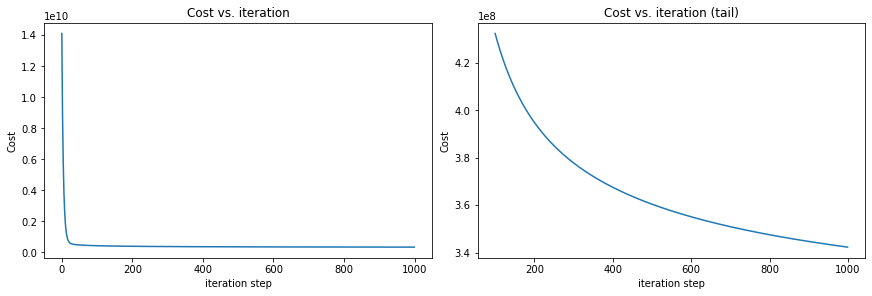

In [86]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

##### Comparing performance with other models

In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

#Splitting our training set so that we can better measure performance
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [89]:
#initialising our parameters and setting
m,_ = X_train_set.shape
initial_w = np.random.randint(0,30,n)
initial_b = 0.
iterations = 1000
alpha = 0.09
lambda_ = -2

#Running Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, lambda_, compute_cost, compute_gradient,
                                            alpha, iterations)
ssr = 0
sst = 0
n,_ = X_test_set.shape

for j in range(n):
    pred = np.dot(X_test_set[j], w_final) + b_final
    pred = pred
    ssr += (y_test_set[j] - pred)**2
    sst += (y_test_set[j] - np.mean(y_test_set))**2
    
RR = 1 - (ssr / sst)
print(RR)

Iteration    0: Cost 14114450374.59
Iteration  100: Cost 432266696.75
Iteration  200: Cost 394830169.19
Iteration  300: Cost 377761455.49
Iteration  400: Cost 367492345.70
Iteration  500: Cost 360385058.32
Iteration  600: Cost 355067613.06
Iteration  700: Cost 350892305.02
Iteration  800: Cost 347501397.33
Iteration  900: Cost 344675787.86
0.9060804479067845


##### Performing cross validation

In [91]:
m,n = X_train_set.shape
initial_w = np.random.randint(0,30,n)
initial_b = 0.
iterations = 1000
alpha = 0.09
lambda_ = -2
k=6
c = int(m - m/6)
TRR = 0

data_split = np.array_split(X_train, k)
label_split = np.array_split(y_train, k)
scores = []
    
for i in range(k):
    X_temp_train = data_split[i]
    X_temp_test = np.concatenate(data_split[:i] + data_split[i+1:])
    y_temp_train = label_split[i]
    y_temp_test = np.concatenate(label_split[:i] + label_split[i+1:])
        
    w_final, b_final, J_hist = gradient_descent(X_temp_train, y_temp_train, initial_w, initial_b, lambda_, compute_cost, compute_gradient,
                                            alpha, iterations)
    
    ssr = 0
    sst = 0        
    for j in range(c):
        pred = np.dot(X_temp_test[j], w_final) + b_final
        pred = pred
        ssr += (y_temp_test[j] - pred)**2
        sst += (y_temp_test[j] - np.mean(y_test_set))**2

    RR = 1 - (ssr / sst)
    TRR += RR
    print(f'R²:{RR:0.3f}')

print(f'Mean R²:{TRR / 6:0.3f}')

Iteration    0: Cost 14575830702.23
Iteration  100: Cost 188658988.97
Iteration  200: Cost 150394618.13
Iteration  300: Cost 132655725.49
Iteration  400: Cost 122359432.79
Iteration  500: Cost 115562849.98
Iteration  600: Cost 110677673.52
Iteration  700: Cost 106955345.62
Iteration  800: Cost 104000371.12
Iteration  900: Cost 101584205.42
R²:0.831
Iteration    0: Cost 15028499158.88
Iteration  100: Cost 180342712.16
Iteration  200: Cost 146018863.58
Iteration  300: Cost 130819017.18
Iteration  400: Cost 121993271.76
Iteration  500: Cost 116084950.48
Iteration  600: Cost 111780504.81
Iteration  700: Cost 108469233.54
Iteration  800: Cost 105825288.36
Iteration  900: Cost 103656751.31
R²:0.830
Iteration    0: Cost 14063207706.03
Iteration  100: Cost 503617170.60
Iteration  200: Cost 410201063.21
Iteration  300: Cost 362520580.39
Iteration  400: Cost 333566904.02
Iteration  500: Cost 314071600.71
Iteration  600: Cost 299991192.42
Iteration  700: Cost 289294627.15
Iteration  800: Cost 280

Ridge Test Set R²: 0.882
Lasso Test Set R²: 0.885
Gradient Boosting Test Set R²: 0.912
Random Forest Test Set R²: 0.868


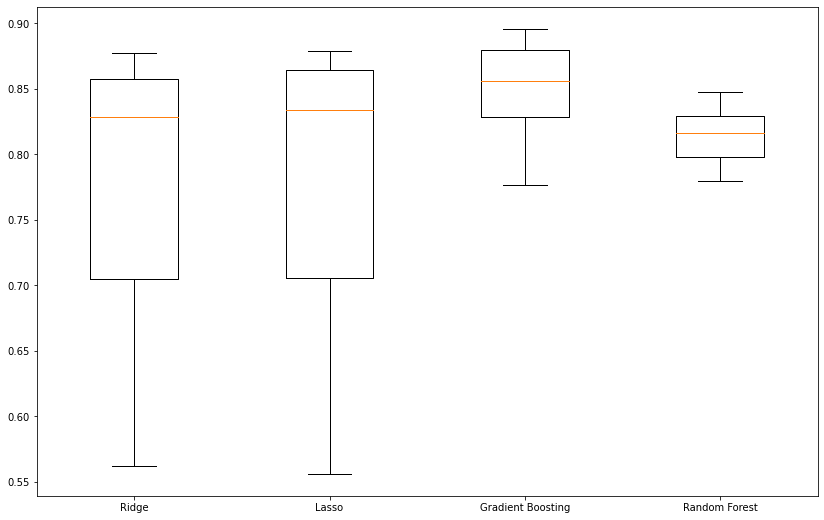

In [94]:
#Looping through performance on other models
models = {'Ridge': Ridge(alpha=0.009), 'Lasso': Lasso(alpha=0.01), 
          'Gradient Boosting': GradientBoostingRegressor(n_estimators = 80), 
          'Random Forest': RandomForestRegressor(n_estimators=500, max_features='sqrt', bootstrap=True, 
                                                           max_samples=0.7, warm_start=False)}
results = []

for name, model in models.items():
    model.fit(X_train_set, y_train_set)
    model_pred = model.predict(X_test_set)    
    r_squared = model.score(X_test_set, y_test_set)

    print("{} Test Set R²: {}".format(name, round(r_squared, 3)))

for model in models.values():
    kf = KFold(6, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_set, y_train_set, cv=kf)
    results.append(cv_scores)
    
    
plt.boxplot(results, labels = models.keys())
plt.rcParams["figure.figsize"] = (13,9)
plt.show()

Gradient boosting and maybe even other models with better tuning would beat our Gradient Descent model but for the sake of learning the first model will be used for the submission to the competition

## 
## 
# Submission 

##### Predictions for X_test

In [95]:
m,_ = X_test.shape
for i in range(m):
    y_pred = np.dot(X_test[i], w_final) + round(b_final, 2)
    y_pred = round(y_pred, 2) 

    

In [96]:
submission_data = {'Id': test_data.Id, 'SalePrice': y_pred}
sub_cost = pd.DataFrame(submission_data)

sub_cost.to_csv('submission_cost.csv', index=False)